# Summary of patient data
*  *
#### Age: 
* Obvious one...
#### Sex:
* 0: Female
* 1: Male
#### CP:
* 0: Typical Angina
* 1: Atypical Angina
* 2: Non-Anginal Pain
* 3: Asymptomatic
#### trestbps:
* resting blood pressure in mm Hg(on admission to the hospital)
#### Chol:
- **Cholesterol**
 Serum Cholesterol in mg/dl
#### fbs:
- **Fasting Blood Sugar**  0:Less Than 120mg/ml
                     1: Greater Than 120mg/ml
#### Resting Blood Pressure:
 Person's resting blood pressure.
* 0: Normal
* 1: ST-T Wave Abnormality
* 2: Left Ventricular Hypertrophy
#### thalach:
 Maximum Heart Rate Achieved
#### exang:
Exercise Induced Angina
* 1: Yes
* 0: No
#### ST Depression:
 ST depression induced by exercise relative to rest.
#### Slope:
Slope of the peak exercise ST segment
* 0: Upsloping
* 1: Flat
* 2: Downsloping
#### ca:
Blood vessels
#### thal:
Thalassemia(A blood disorder called 'Thalassemia')
* 0: Normal
* 1: Fixed Defect
* 2: Reversable Defect
#### target:
Desired goal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

 #### Import important Libraries

In [2]:
heart= pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Import and read Data  

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### All Data is namber

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Describe Data

In [5]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 #### Is not nan values

# EDA

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

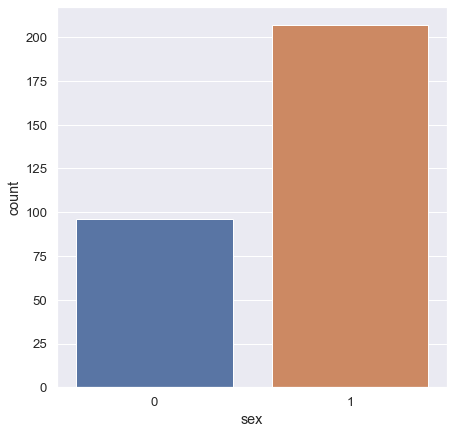

In [6]:
sns.countplot(heart['sex'])

## Most of them are men

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cp', ylabel='count'>

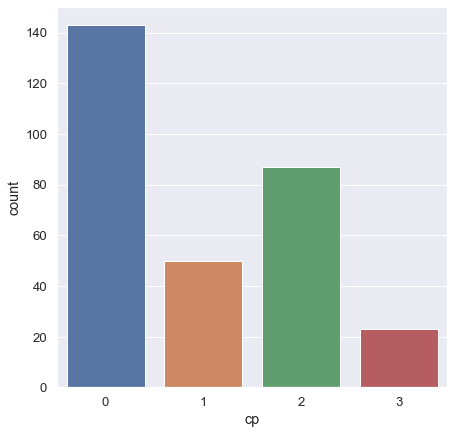

In [7]:
sns.countplot(heart['cp'])

## Most of them suffer from typical slaughter, then pain other than slaughter

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='restecg', ylabel='count'>

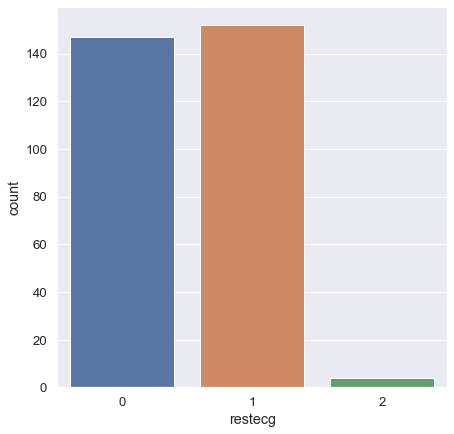

In [8]:
sns.countplot(heart['restecg'])

## Roughly half of them suffer from wave anomaly, and the other half don't

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='exang', ylabel='count'>

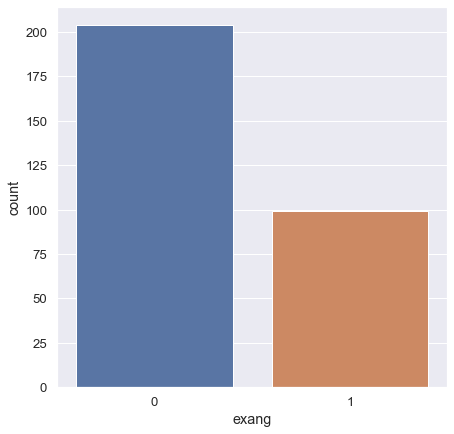

In [9]:
sns.countplot(heart['exang'])

## Most of the people do not suffer from a heart attack

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

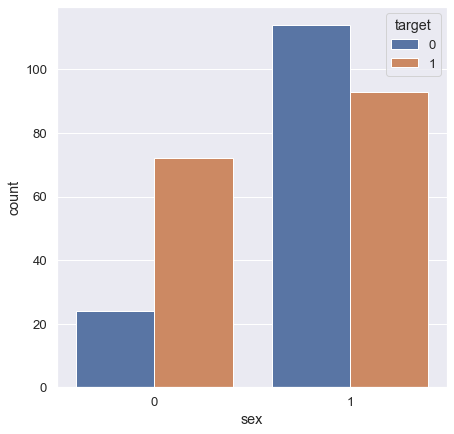

In [10]:
sns.countplot(heart["sex"],hue=heart["target"])

## Although most of those present are men, women are more susceptible to the disease

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cp', ylabel='count'>

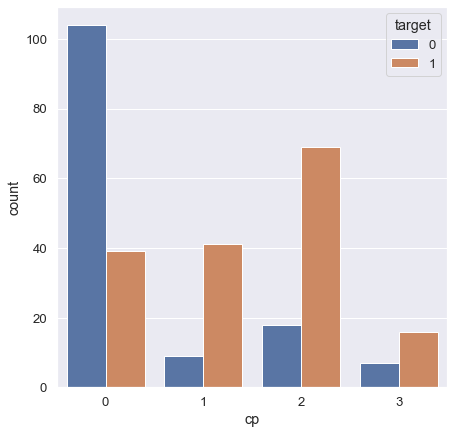

In [11]:
sns.countplot(heart["cp"],hue=heart["target"])

## Most of the injured suffer from pain other than pectoral angina 

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='restecg', ylabel='count'>

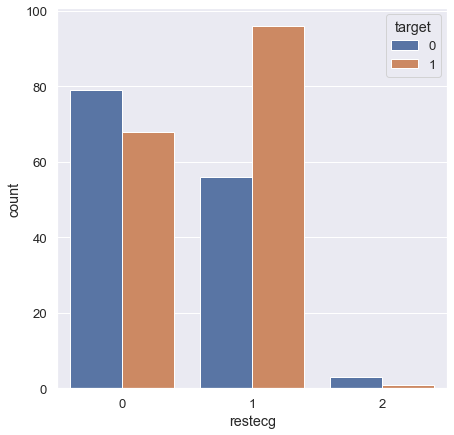

In [12]:
sns.countplot(heart["restecg"],hue=heart["target"])

## Most patients suffer from a wave anomaly or normal

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='exang', ylabel='count'>

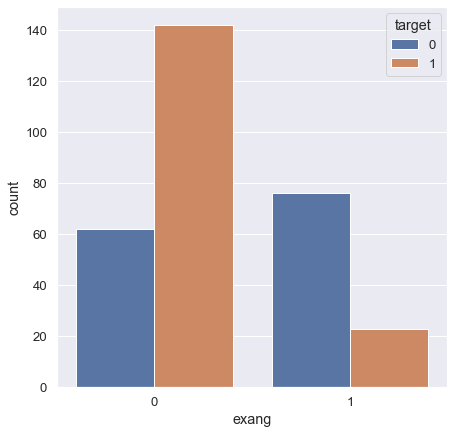

In [13]:
sns.countplot(heart["exang"],hue=heart["target"])

## Most of the injured do not suffer from a heart attack  

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thal', ylabel='count'>

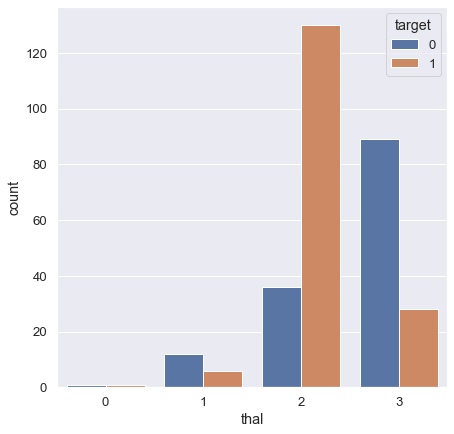

In [14]:
sns.countplot(heart["thal"],hue=heart["target"])

## Most of the infected people have a normal number of blood vessels    

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='slope', ylabel='count'>

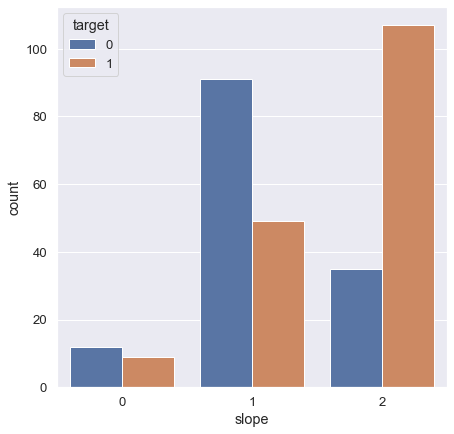

In [15]:
sns.countplot(heart["slope"],hue=heart["target"])

## Most of the sufferers have high rates of depression when exercising

<AxesSubplot:>

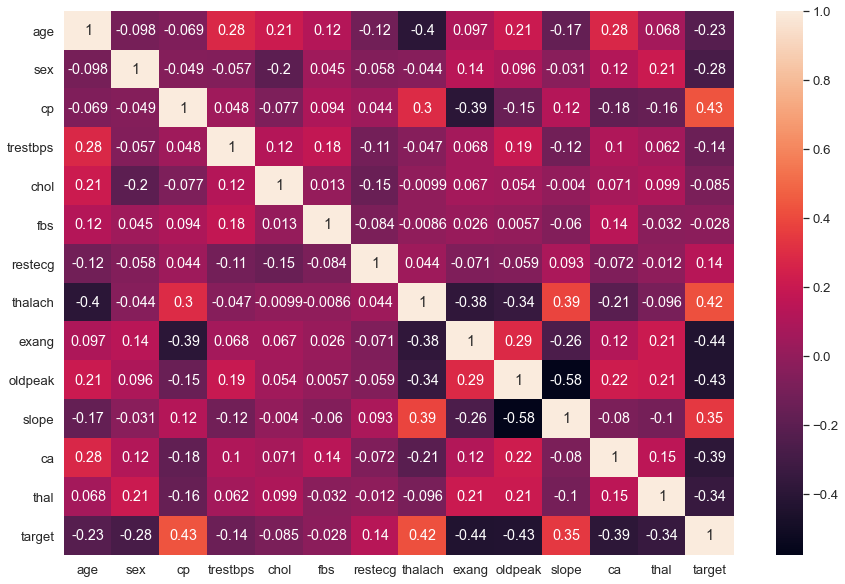

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(),annot=True)

### Conclusions
- ***Women are more susceptible to the disease than men*** 
- ***Although most patients have an arrhythmia, about half of them do not***
- ***There is no relationship between angina and the disease***
- ***Blood vessels of normal patients***
- ***Patients experience severe depression when exercising***

# ML

In [17]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [18]:
X=heart.drop("target",axis=1)
y=heart["target"]

In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
from sklearn.metrics import confusion_matrix,f1_score

In [26]:
f1_score(y_test,lr_pred)

0.8247422680412373

In [27]:
lr.score(X_test,y_test)

0.8131868131868132

In [28]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

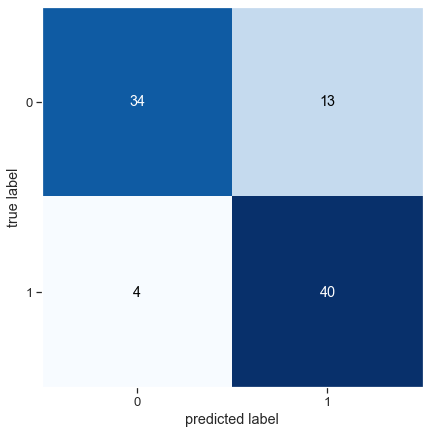

In [29]:
plot_confusion_matrix(confusion_matrix(y_test,lr_pred))

In [30]:
import pickle

In [37]:
ave_model=open("saved_model.sav","wb")
pickle.dump(lr,ave_model)